# import library

In [136]:
# Import Libraries for Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import pickle

import os
# os.listdir()

# prepare data and save to csv

### get freesurfer data

In [137]:
file1 = '../../BrainPlots/data/MeshCollisionData/mesh-intersection/Intersection.csv'

In [138]:
df = pd.read_csv(file1)

In [139]:
replace_dic = {
    "cortexode":"CortexODE",
    "freesurfer":"*FreeSurfer",
    "corticalflow":"CorticalFlow",
    "deepcsr":"DeepCSR",
    "vox2cortex":"Vox2Cortex",
}

In [140]:
df = df.replace(replace_dic)

In [141]:
df2 = df[['model','collision-no-cut','collision-cut']]

In [142]:
df_pivot = pd.melt(df2, id_vars=['model'],var_name='cut or no cut',
                  value_name = 'ratio')

In [143]:
df_pivot

,model,cut or no cut,ratio
0,CortexODE,collision-no-cut,3.398188
1,CortexODE,collision-no-cut,3.935889
2,CortexODE,collision-no-cut,2.320683
3,CortexODE,collision-no-cut,3.399443
4,CortexODE,collision-no-cut,3.593057
...,...,...,...
1003,*FreeSurfer,collision-cut,0.439546
1004,*FreeSurfer,collision-cut,0.341241
1005,*FreeSurfer,collision-cut,0.572123
1006,*FreeSurfer,collision-cut,0.381083


In [144]:
replace_dic = {'collision-no-cut':"Original",
               'collision-cut':"Medial wall removed",
              'ratio':"Intersection percentage (%)"}
df_pivot = df_pivot.replace(replace_dic)

In [145]:
df_pivot

,model,cut or no cut,ratio
0,CortexODE,Original,3.398188
1,CortexODE,Original,3.935889
2,CortexODE,Original,2.320683
3,CortexODE,Original,3.399443
4,CortexODE,Original,3.593057
...,...,...,...
1003,*FreeSurfer,Medial wall removed,0.439546
1004,*FreeSurfer,Medial wall removed,0.341241
1005,*FreeSurfer,Medial wall removed,0.572123
1006,*FreeSurfer,Medial wall removed,0.381083


### dump to pickle

In [146]:
import pickle
with open('collision_dataframe_nocut_and_cut.pickle', 'wb') as f:
    pickle.dump(df_pivot, f)

# plot

In [147]:
df_pivot = df_pivot.sort_values(by = ['model','cut or no cut'], ascending=[True,False])

In [158]:
df_pivot

,model,cut or no cut,ratio
396,*FreeSurfer,Original,1.918918
397,*FreeSurfer,Original,1.612673
398,*FreeSurfer,Original,1.640024
399,*FreeSurfer,Original,1.892718
400,*FreeSurfer,Original,1.919089
...,...,...,...
895,Vox2Cortex,Medial wall removed,0.286989
896,Vox2Cortex,Medial wall removed,0.253594
897,Vox2Cortex,Medial wall removed,1.012067
898,Vox2Cortex,Medial wall removed,0.319780


In [160]:
# x,y,hue = "model","ratio","cut or no cut"

# # Assuming 'df' is your DataF
# custom_order = {'CortexODE': 1, '*FreeSurfer': 2, 'CorticalFlow': 3, 'Vox2Cortex':4, 'DeepCSR':5}  # Custom order dictionary
# df_sorted = df.groupby(by = [x,hue]),key = lambda x: x.sort_values('model', key=lambda y: y.map(custom_order))).reset_index(drop=True)

# df_sorted[y]

In [157]:
df_sorted

NameError: name 'df_sorted' is not defined

In [239]:
sns.set(rc={'figure.figsize':(15,6)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

def plot(tips, x, y, hue,medians,order = ['CortexODE','*FreeSurfer','CorticalFlow','Vox2Cortex','DeepCSR']
,color = sns.color_palette("Set2", 10)):
    sns.stripplot(x=x, y=y, hue=hue,
    data=tips, jitter=.2,dodge=.5,
    palette="Set2",linewidth=1,edgecolor='gray',alpha=.5,order=order)

    # Get the ax object to use later.
    ax = sns.boxplot(x=x,y=y,hue=hue,
    data=tips,palette="Set2",fliersize=0,order=order)
    
    tx = tips.groupby(by = [x,hue])[y].median()
    
    vertical_offset = -.2

    # Get the handles and labels. For this example it'll be 2 tuples
    # of length 4 each.
    handles, labels = ax.get_legend_handles_labels()
    
#     print(len(ax.get_xticks()))
#     print(len(medians))

    c1,c2 = color[0],color[1]
    offxtick = -.6
    for xtick in ax.get_xticks():
        idx = 2 * xtick 
        ax.text(xtick + .1 + offxtick,medians[idx] + vertical_offset,medians[idx], 
            horizontalalignment='center',size='x-small',color=c1,weight='semibold')

        idx = 2 * xtick + 1
        ax.text(xtick + .5 + offxtick,medians[idx] + vertical_offset,medians[idx], 
            horizontalalignment='center',size='x-small',color=c2,weight='semibold')
               

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    l = plt.legend(handles[0:2], labels[0:2], loc='best', borderaxespad=0., facecolor='white',edgecolor='white')
    # plt.ylabel('Collision counts / Triangle counts (%)')
    plt.xlabel('')
    # plt.yscale('log')
    plt.ylabel('White and pial mesh intersections (%)')
#     if name=='cut':
#         plt.ylabel('Self intersections\n without medial wall (%)')
    plt.xlim(-0.7, 4.5)
    plt.ylim(-1,10.2)
    plt.savefig('Collisions.png', dpi=300)
    plt.savefig('Collisions.svg', format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

## plot

In [240]:
def calc_medians():
    order = ['CortexODE','*FreeSurfer','CorticalFlow','Vox2Cortex','DeepCSR']
    medians = []
    for i in order:
        t = df_pivot
        t = t[t['model']==i]
        medians.append(np.median(t[t['cut or no cut']=='Original']['ratio']))
        medians.append(np.median(t[t['cut or no cut']=='Medial wall removed']['ratio']))
    medians = [round(i,2) for i in medians]
    return medians

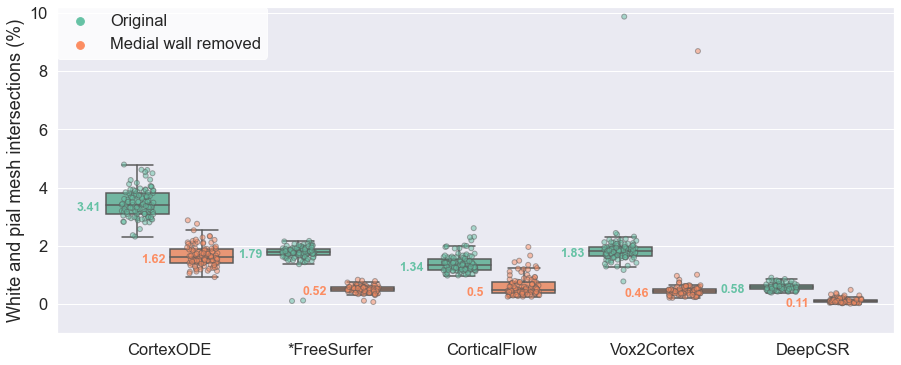

In [241]:
plot(df_pivot, "model","ratio","cut or no cut",calc_medians())

AttributeError: 'PathCollection' object has no property 'padding'

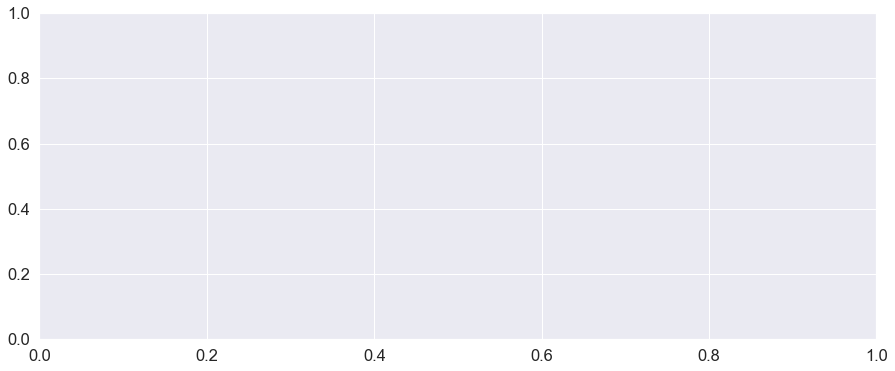

In [230]:
help(sns.stripplot(padding=2
                  ))